In [29]:
# 导入 所有 不同状态下的 数据
import pandas as pd
import os
H = 27
W = 15

parentPath = "../"

# 假设 DataSource 文件夹已经存在，否则您需要创建它  
data_source_dir = parentPath + "csv"  
if not os.path.exists(data_source_dir):  
    os.makedirs(data_source_dir) 
else:
    print("file exist")


paths = [
        #  parentPath + f"csv/01.csv",
        #  parentPath + f"csv/02.csv",
         parentPath + f"csv/03.csv",
        #  parentPath + f"csv/04.csv",
        #  parentPath + f"csv/05.csv",
         ]


# 遍历文件路径，检查文件是否存在  
for file in paths:  
    if not os.path.exists(file):  
       file = open(file, 'w')      

file exist


In [30]:
# # 删除文件夹
# import shutil

# DeleteFiles = [parentPath + "Mark/images/test", parentPath + "Mark/images/train"]  

# for folder in DeleteFiles:  
#     print(folder)
#     if os.path.exists(folder):  
#         for filename in os.listdir(folder):  
#             file_path = os.path.join(folder, filename)  # 使用os.path.join来确保路径的正确性  
#             try: 
#                 shutil.rmtree(file_path) 
#                 print(f"File {file_path} has been deleted.")  
#             except OSError as e:  
#                 print(f"Error: {e.strerror} - {file_path}")  
#     else:  
#         print(f"Folder {folder} does not exist.")


In [31]:
def ehan(value):
    for rowIndex in range(len(value)):
            l = False
            r = False
            for colIndex in range(len(value[0])):
                if (colIndex + 1) < len(value[0]) and value[rowIndex][colIndex] == 0 and value[rowIndex][colIndex + 1] != 0 and l == False:
                    value[rowIndex][colIndex] = value[rowIndex][colIndex + 1] / 3
                    l = True
                if (colIndex+1) < len(value[0]) and value[rowIndex][colIndex] != 0 and value[rowIndex][colIndex + 1] == 0 and r == False:
                    value[rowIndex][colIndex+1] = value[rowIndex][colIndex] / 3
                    r = True
                if l == True and r == True:
                     l = False
                     r = False
    return value

In [32]:
def ehan_row(value):
    for colIndex in range(len(value[0])):
        l = False
        r = False
        for rowIndex in range(len(value)):
            if (rowIndex + 1) < len(value) and value[rowIndex][colIndex] == 0 and value[rowIndex + 1][colIndex] != 0 and l == False:
                value[rowIndex][colIndex] = value[rowIndex + 1][colIndex] / 3
                l = True
            if (rowIndex + 1) < len(value) and value[rowIndex][colIndex] != 0 and value[rowIndex + 1][colIndex] == 0 and r == False:
                value[rowIndex + 1][colIndex] = value[rowIndex][colIndex] / 3
                r = True
            if  l == True and r == True:
                l = False
                r = False
    return value


In [33]:
# 计算数据l这个面的斜率，将斜率大的数据做特殊处理
import math
from PIL import Image

# def ValueToImage(value):
#     l = value
#     slopeData = []
#     for row in l:
#         slope = []
#         for index in range(0,len(row)):
#             if row[index] != 0:
#                 if index != 0 and row[index - 1] != 0:
#                     slope.append((row[index] - row[index - 1]))
#                 else:
#                     slope.append(1)
#             else:
#                 slope.append(1)
#         slopeData.append(slope)

#     result = []

#     # 逐元素相除
#     for i in range(len(l)):
#         row_result = []
#         for j in range(len(l[i])):
#             if slopeData[i][j] > 3:  # 确保分母不为零
#                 # row_result.append(l[i][j]*1.5)
#                 # row_result.append(l[i][j] / slopeData[i][j] / slopeData[i][j] / slopeData[i][j] / slopeData[i][j])
#                 row_result.append(l[i][j])
#             elif slopeData[i][j] < 0 :
#                 # row_result.append(l[i][j]*1.5)
#                 # row_result.append(l[i][j] * math.sqrt(math.fabs(slopeData[i][j] * 1.5)))
#                 row_result.append(l[i][j])
#             else:
#                 # row_result.append(l[i][j] * 1.5)
#                 row_result.append(l[i][j])
#         result.append(row_result)

def ValueToImage(value):
    l = value
    slopeData = []
    for col_index in range(len(l[0])):  # 按列遍历
        slope = []
        for row_index in range(len(l)):  # 对每列中的每行元素进行处理
            if l[row_index][col_index] != 0:
                if row_index != 0 and l[row_index - 1][col_index] != 0:
                    slope.append(l[row_index][col_index] - l[row_index - 1][col_index])
                else:
                    slope.append(1)
            else:
                slope.append(1)
        slopeData.append(slope)
    
    # 将列列表转回行列表
    slopeData = list(map(list, zip(*slopeData)))

    result = []
    for j in range(len(l[0])):  # 按列遍历
        col_result = []
        for i in range(len(l)):  # 对每列中的每个元素进行处理
            if slopeData[i][j] > 3:  # 确保分母不为零
                col_result.append(l[i][j] / slopeData[i][j]**4)  # 逐列相除，分母四次幂
                # col_result.append(l[i][j] )  # 逐列相除，分母四次幂
            elif slopeData[i][j] < 0:
                col_result.append(l[i][j] * math.sqrt(abs(slopeData[i][j] * 1.5)))  # 负值情况
                # col_result.append(l[i][j] )  # 负值情况
            else:
                col_result.append(l[i][j])  # 否则保持原值
        result.append(col_result)

    # 如果你需要保持与原始输入的行列结构一致，最后也可以转置回去
    result = list(map(list, zip(*result)))  # 将列结果转回行结果

    result = ehan(result)
    result = ehan_row(result)

    matrix_data = []
    for it in result:
        listrow = []
        for value in it:
            point = (int(value),int(value),int(value))
            listrow.append(point)
        matrix_data.append(listrow)


    # print(matrix_data)
    # 创建一个空的图像对象，大小为16x16像素，颜色模式为RGB
    image = Image.new("RGB", (H, W))

    for row in range(0,H):
        for col in range(0,W):
            image.putpixel((row, col), matrix_data[row][col])
    resized_image = image.resize((270,150))
    return resized_image


In [34]:
# 将excel 数据按照 size * size数据进行分组
def SplitData(path,size):

    # 从excel中获取数据
    handData = pd.read_csv(path,header=None)
    
    # 给excel中数据加上头标题
    handData.columns = [i for i in range(0,size)]
    # 指定每张照片的像素点大小
    handData = [handData[i:i+27] for i in range(0, len(handData), 27)]

    return handData

3069


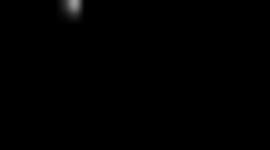

In [35]:
# 遍历所有文件
for path in paths:
    # 获取当前文件数据
    imageData = SplitData(path,W)
    # print(path)
    # 获取当前文件名
    # print(path.split(".")[4].split("/")[3])
    fileName = path.split(".")[2].split("/")[2]
    # print(fileName)
    # print(parentPath + "image3/test/" + fileName)
    # 判断 文件是否存在 如果不存在就创建文件
    # print(os.path.exists(parentPath + "TrueObject/images/test/" + fileName))
    if not os.path.exists(parentPath + "process/test/" + fileName):
        os.mkdir(parentPath + 'process/test/' + fileName)
    # else:
    #     continue
    if not os.path.exists(parentPath + "process/train/" + fileName):
        os.mkdir(parentPath + 'process/train/' + fileName)
    # else:
    #     continue
    # print (fileName)

    # # 查看一共多少张照片
    print(len(imageData))

    train_index = -1
    test_index = -1

    for index in range(0,len(imageData)):
        # 第 index 张 照片的像素点值
        indexImage = imageData[index]
        # 将 indexImage 转成 二位列表
        ImageValueList = indexImage.values.tolist()
        # 将生成的二位列表进行处理（模拟实际情况下压力接触点进行处理）
        image = ValueToImage(ImageValueList)

        if index % 3 != 0:
            train_index = train_index + 1
            save_dir = os.path.join(parentPath + "process", "train", fileName)  
            # 构建完整的文件名（包括索引）  
            save_file = os.path.join(save_dir, f"{train_index}.png")  
            # 保存图片  
            # image.save("image2/train/{filename}" + str(train_index) + ".png")
        else:
            test_index = test_index + 1
            save_dir = os.path.join(parentPath + "process/", "test", fileName)  
            save_file = os.path.join(save_dir, f"{test_index}.png")  

        # train_index = train_index + 1
        # save_dir = os.path.join(parentPath + "capacitive/images", "train", fileName)  
        # # 构建完整的文件名（包括索引）  
        # save_file = os.path.join(save_dir, f"{train_index}.png")  
        image.save(save_file)
image   